In [7]:
!pip install sklearn
!pip install quandl
!pip install pandas

## Regression

The idea of `regression` is to take continous data and fit is as a best fit line such as `y = mx + b`.

In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as pyplot
from matplotlib import style

In [9]:
data = pd.read_csv("student-mat.csv", sep = ';')
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]

In [10]:
#Exclude Grade 3 from X array
X = np.array(data.drop(['G3'], 1))
y = np.array(data['G3'])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
linear = sklearn.linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

0.7762295104833651
Coefficient: 
 [ 0.14813351  0.98077241 -0.17798686 -0.28847671  0.03427183]
Intercept: 
 -1.4350181767247392
5.020087245381138 [7 6 1 1 0] 0
9.768986016108332 [11 10  2  1 12] 10
4.370986972653961 [ 6  5  1  1 14] 5
10.221262935316645 [ 9 11  3  0  2] 11
16.438443402515 [15 16  1  0  4] 15
9.010442542946745 [10  9  3  1 28] 9
7.951358284432265 [6 9 1 1 4] 8
8.654382155593835 [10  9  2  0  4] 11
14.260221418742056 [14 14  1  0  2] 14
-0.8645471950710668 [7 0 1 1 0] 0
11.06032749083063 [13 11  2  0  4] 11
7.753199593064743 [11  8  2  0  2] 8
7.701571885618449 [7 9 2 2 6] 8
11.434177168820042 [12 12  4  0  1] 12
8.476395292121454 [10  9  3  0  4] 9
9.744597762770281 [10 10  1  0  2] 10
11.785732420467292 [11 12  1  0  0] 10
9.076690314996611 [11  9  2  0 12] 9
10.804960013725259 [11 11  1  0  0] 12
8.44639721731593 [ 8  8  1  0 30] 8
6.621355817893459 [8 8 1 3 2] 10
5.2676644136150035 [7 6 2 0 4] 6
4.4195608576513905 [6 5 1 0 7] 6
18.98147606382773 [18 18  1  0  8] 18


`Pickle` will allow us to store the data that we acquired from the `regression`. This will help us avoid running the model over and over again.

In [11]:
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(linear, f)

In [12]:
pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

Text(0, 0.5, 'G3')

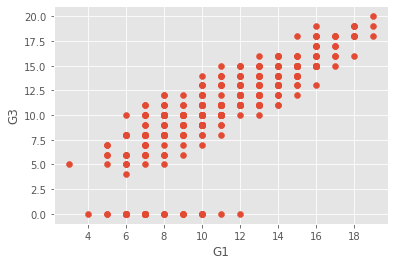

In [13]:
style.use('ggplot')
pyplot.scatter(data['G1'], data['G3'])
pyplot.xlabel('G1')
pyplot.ylabel('G3')

## KNN (K Nearest Neighbor)

For the `K Nearest Neighbor` algorithm, we look for the nearest points to the different classes where `K` is number of data points that is near the point of interest. 

In [2]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

In [3]:
data = pd.read_csv("car.data")
data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
le = preprocessing.LabelEncoder()
buying = le.fit_transform(list(data['buying']))
maint = le.fit_transform(list(data['maint']))
door = le.fit_transform(list(data['door']))
persons = le.fit_transform(list(data['persons']))
lug_boot = le.fit_transform(list(data['lug_boot']))
safety = le.fit_transform(list(data['safety']))
cls = le.fit_transform(list(data['class']))

In [5]:
X = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(cls)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [15]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

predicted = model.predict(x_test)
names = ['unaccaptable', 'acceptable', 'good', 'very good']

for x in range(len(predicted)):
    print('Predicted: ', names[predicted[x]], 'Data: ', x_test[x], 'Actual: ', names[y_test[x]])
    n = model.kneighbors([x_test[x]], 9, True)
    print('Neighbors: ', n)

0.9190751445086706
Predicted:  unaccaptable Data:  (3, 0, 0, 2, 0, 2) Actual:  good
Neighbors:  (array([[1.        , 1.        , 1.        , 1.        , 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[1246, 1503,  649, 1380,  578, 1413,  289,  123,  604]],
      dtype=int64))
Predicted:  good Data:  (0, 2, 1, 0, 0, 1) Actual:  good
Neighbors:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 458,  432,  555, 1181, 1405,  295,  601, 1097, 1111]],
      dtype=int64))
Predicted:  good Data:  (3, 0, 1, 1, 2, 2) Actual:  good
Neighbors:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 117, 1270,  736,  998, 1389,  564,  311,   38,  931]],
      dtype=int64))
Predicted:  good Data:  (0, 0, 3, 0, 1, 1) Actual:  good
Neighbors:  (array([[1.        , 1.        , 1.        , 1.        , 1.  

## Support Vector Machine (SVM)

For `support vector machines`, we need to create a hyperplane which maximizes the distance between the two closest points in the two classes. The larger the distance, the easier it is to separate the 2 classes. For the datasets which are harder to spearate, a `kernel` is used to separate the data by adding an extra dimension. A `kernel` is just an function which uses the 2 classes as an input and set out an higher dimension output. If adding one `kernel` isn't satisfactory to separate the data, an additional dimension needs to be added.

In [16]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [20]:
cancer = datasets.load_breast_cancer()

print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [21]:
X = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

classes = ['malignant', 'benigh']

In [28]:
clf = svm.SVC(kernel = 'linear', C = 1)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.9298245614035088
